In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import PercentFormatter

myFmt1 = PercentFormatter(xmax=1, decimals=0, symbol=' %')

myFmt100 = PercentFormatter(xmax=100, decimals=0, symbol=' %')

In [3]:
df = pd.read_csv('http://taanila.fi/employee.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df1 = pd.crosstab(df['RelationshipSatisfaction'], 'n')
df1.index = ['Huono', 'Tyydyttävä', 'Hyvä', 'Erinomainen']
df1.columns.name = ''
df1


,n
Huono,276
Tyydyttävä,303
Hyvä,459
Erinomainen,432


In [7]:
df1['%'] = df1/df1.sum()*100

df1.style.format({'%':'{:.1f} %'})

,n,%
Huono,276,18.8 %
Tyydyttävä,303,20.6 %
Hyvä,459,31.2 %
Erinomainen,432,29.4 %


Text(0.5, 0, 'Prosenttia (n=1470)')

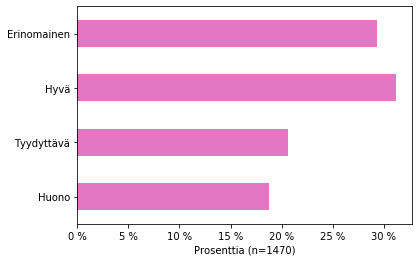

In [63]:
ax1 = df1['%'].plot.barh(color='C6')
ax1.xaxis.set_major_formatter(myFmt100)
n=df1['n'].sum()
ax1.set_xlabel('Prosenttia (n=' + str(n) + ')')

In [84]:
df2 = pd.crosstab(df['Education'], df['Gender'], normalize='columns')
df2

Gender,Female,Male
Education,,
1,0.102041,0.124717
2,0.198980,0.187075
3,0.399660,0.382086
4,0.261905,0.276644
5,0.037415,0.029478


In [85]:
Education = ['Below Collage', 'Collage', 'Bachelor', 'Master', 'Doctor']
df2.index = Education
df2.Female = (df2.Female * 100)
df2.Male = (df2.Male * 100)

df2

Gender,Female,Male
Below Collage,10.204082,12.471655
Collage,19.897959,18.707483
Bachelor,39.965986,38.208617
Master,26.190476,27.664399
Doctor,3.741497,2.947846


In [56]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Below Collage to Doctor
Data columns (total 2 columns):
Female    5 non-null float64
Male      5 non-null float64
dtypes: float64(2)
memory usage: 280.0+ bytes


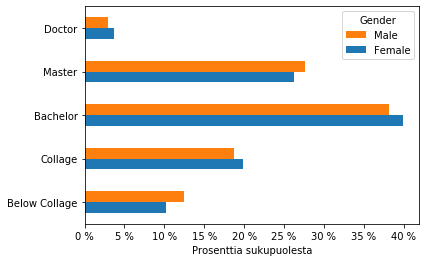

In [86]:
ax2 = df2.plot.barh(legend='reverse')
ax2.set_xlabel('Prosenttia sukupuolesta')
ax2.xaxis.set_major_formatter(myFmt100)

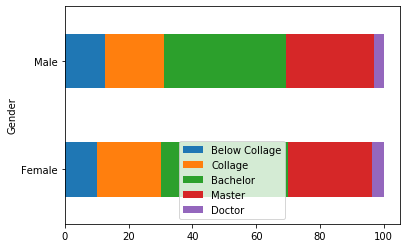

In [87]:
ax2 = df2.T.plot.barh(stacked = True)

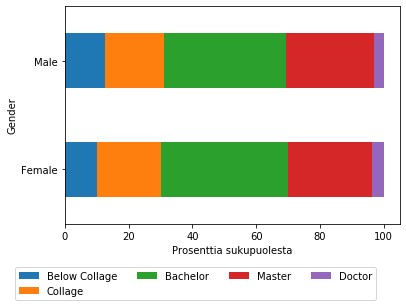

In [88]:
ax3 = df2.T.plot.barh(stacked = True)
ax3.set_xlabel('Prosenttia sukupuolesta')
ax3.legend(loc=(-0.15, -0.35), ncol=4)


In [ ]:
df4.index = 